<a href="https://colab.research.google.com/github/mae001/Machine-Learning-projects/blob/main/Unsupervised_task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt


In [ ]:
((X_train, y_train), (X_test, y_test)) = tf.keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
X_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [ ]:
import numpy as np
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

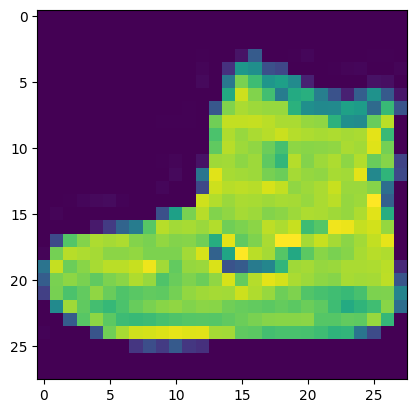

In [ ]:
plt.imshow(X_train[0]) #first image in the 0 index of X_train

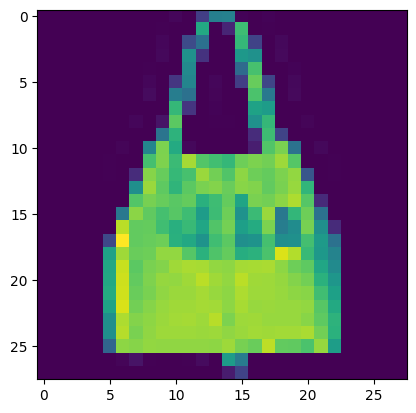

In [ ]:
plt.imshow(X_train[59000])

In [ ]:
from sklearn.linear_model import LogisticRegression

n_labeled=50
log_reg=LogisticRegression()

X_train_reshaped = X_train[:n_labeled].reshape(n_labeled, -1)

log_reg.fit(X_train_reshaped[:n_labeled], y_train[:n_labeled])

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
X_test.shape

(10000, 28, 28)

In [ ]:
log_reg.score(X_test.reshape(-1, 28*28), y_test) #reshaping test data

0.6536

In [ ]:
from sklearn.cluster import KMeans
k=50
kmeans=KMeans(n_clusters=k, n_init=10, random_state=42)
X_digits_dist=kmeans.fit_transform(X_train_reshaped)
representative_digit_idx=X_digits_dist.argmin(axis=0)
X_representative_clothes=X_train_reshaped[representative_digit_idx]

In [ ]:
X_representative_clothes.shape

(50, 784)

In [ ]:

X_representative_clothes.shape

(50, 784)

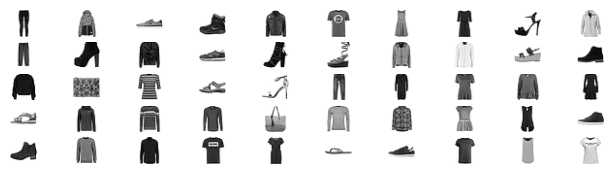

In [ ]:
plt.figure(figsize=(8,2))
for index, X_representative_cloth in enumerate(X_representative_clothes):
  plt.subplot(k // 10, 10, index + 1) # (k/10 -- row (5 rows), column, indexes start from 0 but theres no 0 in the picture, so we start from 1 )
  plt.imshow(X_representative_cloth.reshape(28,28), cmap="binary", #it was vector and we turned it into metrics-2 dimension (bc its a picture and vector can not be picture)
             interpolation="bilinear")
  plt.axis("off")
plt.show()

#data that represents the best:

In [ ]:
y_representative_clothes=np.array([
    1, 4, 7, 9, 4, 0, 3, 3, 5, 4,
    1, 5, 4, 7, 5, 5, 4, 6, 5, 9,
    4, 8, 0, 5, 5, 1, 3, 3, 2, 3,
    5, 2, 2, 6, 8, 0, 6, 3, 3, 7,
    9, 6, 2, 0, 3, 5, 7, 0, 3, 0
])

In [ ]:
log_reg = LogisticRegression(max_iter=10_000)
log_reg.fit(X_representative_clothes, y_representative_clothes)
log_reg.score(X_test.reshape(-1, 28*28), y_test)

0.6226

In [ ]:
kmeans.labels_.shape

(50,)

In [ ]:
#y_train_propagated = np.empty(len(X_train), dtype=np.int64)
#for i in range(k):
#  y_train_propagated[kmeans.labels_==i]= y_representative_clothes[i]

IndexError: boolean index did not match indexed array along dimension 0; dimension is 60000 but corresponding boolean dimension is 50